In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n_cols=10
n_rows=7

actions=[0,1,2,3] #up,down,left,right
n_a=len(actions)

START=[3,0]
GOAL=[3,7]
WIND=[0,0,0,1,1,1,2,2,1,0]

def step(s,a):
    
    row,col=s
    
    if a==0:
        s_=[max(row-1-WIND[col],0),col]
    elif a==1:
        s_=[max(min(row+1-WIND[col],n_rows-1),0),col]
    elif a==2:
        s_=[max(row-WIND[col],0), max(col-1,0)]
    else:
        s_=[max(row-WIND[col],0), min(col+1, n_cols-1)]
        
    if s_==GOAL:
        return s_,0,True
    else:
        return s_,-1,False
    
def e_greedy(eps,q):
    
    if (np.random.random()<=eps):
        return np.random.choice(actions)
    
    else:
        return np.argmax(q)
    
def run_sarsa(n_eps=500,n_stps=500,eps=0.1,lr=0.5):

    Q=np.zeros((n_rows,n_cols,n_a))

    r_all,stp_all,cnt_all=[],[],[]
    stpCnt=0

    for ep in range(n_eps):

        r_sum,done=0,False
        s=START    
        a=e_greedy(eps,Q[s[0],s[1]]) 

        for stp in range(n_stps):

            s_,r,done=step(s,a)
            a_=e_greedy(eps,Q[s_[0],s_[1]])
            delta=r+Q[s_[0],s_[1],a_]-Q[s[0],s[1],a]
            Q[s[0],s[1],a]+=lr*delta

            s=s_
            a=a_
            r_sum+=r
            stpCnt+=1

            if done:
                break

        r_all.append(r_sum)
        stp_all.append(stp)
        cnt_all.append(stpCnt)

        if ep%10==0:
            print(f'ep:{ep}, stps:{stp}, ret:{r_sum}')
    
    return Q,r_all,stp_all,cnt_all

Q,r,stp,cnt=run_sarsa()

ep:0, stps:499, ret:-500
ep:10, stps:106, ret:-106
ep:20, stps:186, ret:-186
ep:30, stps:129, ret:-129
ep:40, stps:16, ret:-16
ep:50, stps:42, ret:-42
ep:60, stps:26, ret:-26
ep:70, stps:46, ret:-46
ep:80, stps:30, ret:-30
ep:90, stps:40, ret:-40
ep:100, stps:20, ret:-20
ep:110, stps:19, ret:-19
ep:120, stps:24, ret:-24
ep:130, stps:14, ret:-14
ep:140, stps:26, ret:-26
ep:150, stps:14, ret:-14
ep:160, stps:15, ret:-15
ep:170, stps:23, ret:-23
ep:180, stps:25, ret:-25
ep:190, stps:15, ret:-15
ep:200, stps:19, ret:-19
ep:210, stps:31, ret:-31
ep:220, stps:16, ret:-16
ep:230, stps:17, ret:-17
ep:240, stps:19, ret:-19
ep:250, stps:31, ret:-31
ep:260, stps:40, ret:-40
ep:270, stps:19, ret:-19
ep:280, stps:23, ret:-23
ep:290, stps:26, ret:-26
ep:300, stps:22, ret:-22
ep:310, stps:30, ret:-30
ep:320, stps:23, ret:-23
ep:330, stps:21, ret:-21
ep:340, stps:17, ret:-17
ep:350, stps:26, ret:-26
ep:360, stps:14, ret:-14
ep:370, stps:15, ret:-15
ep:380, stps:14, ret:-14
ep:390, stps:15, ret:-15
ep:

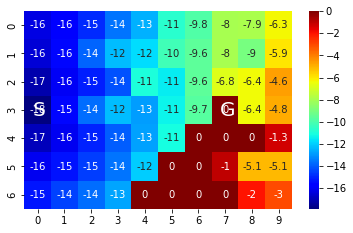

In [46]:
q_heat=np.zeros((n_rows,n_cols))

for i in range(n_rows):
    for j in range(n_cols):
        q_heat[i,j]=np.max(Q[i,j])
        
plt.figure(figsize=(6,8))
plt.subplot(211)
sns.heatmap(q_heat,cmap='jet',annot=True)
plt.annotate('S', (0.3,3.7),fontsize=20,color = "w")
plt.annotate('G', (7.3,3.7),fontsize=20,color = "w")
plt.savefig('heatmap_windygrid.png',dpi=350)

In [10]:
op_act=np.zeros((n_rows,n_cols))

for i in range(n_rows):
    for j in range(n_cols):
        op_act[i,j]=np.argmax(Q[i,j])
        
op_act

array([[0., 0., 3., 3., 3., 3., 3., 3., 3., 1.],
       [3., 3., 3., 3., 3., 3., 3., 3., 2., 1.],
       [3., 3., 0., 3., 3., 3., 3., 0., 3., 1.],
       [3., 3., 3., 3., 0., 3., 3., 0., 3., 1.],
       [3., 1., 0., 3., 3., 3., 0., 1., 2., 2.],
       [1., 1., 3., 3., 3., 0., 0., 1., 2., 0.],
       [3., 3., 3., 3., 0., 0., 0., 0., 2., 2.]])

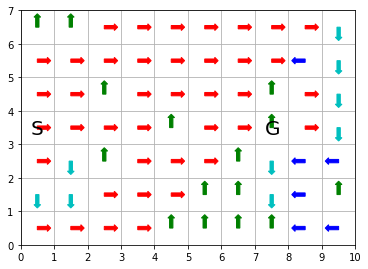

In [34]:
nx=10
ny=7

scale=0.3
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(0,nx+1,1))
ax.set_yticks(np.arange(0,ny+1,1))
plt.grid()
plt.ylim((0,ny))
plt.xlim((0,nx))

for i in range(n_rows):
    for j in range(n_cols):
        if op_act[i,j]==0:
            plt.arrow(j+0.5,6.5-i,0,scale,width=0.1, head_width=0.2, head_length=0.1,fc='g', ec='g')
        elif op_act[i,j]==1:
            plt.arrow(j+0.5,6.5-i,0,-scale,width=0.1, head_width=0.2, head_length=0.1,fc='c', ec='c')
        elif op_act[i,j]==2:
            plt.arrow(j+0.5,6.5-i,-scale,0,width=0.1, head_width=0.2, head_length=0.1,fc='b', ec='b')
        elif op_act[i,j]==3:
            #print(i,j)
            plt.arrow(j+0.5,6.5-i,scale,0,width=0.1, head_width=0.2, head_length=0.1,fc='r', ec='r')
            
plt.annotate('S', (0.3,3.3),fontsize=20)
plt.annotate('G', (7.3,3.3),fontsize=20)
plt.savefig('oppi_windygrid.png',dpi=350)

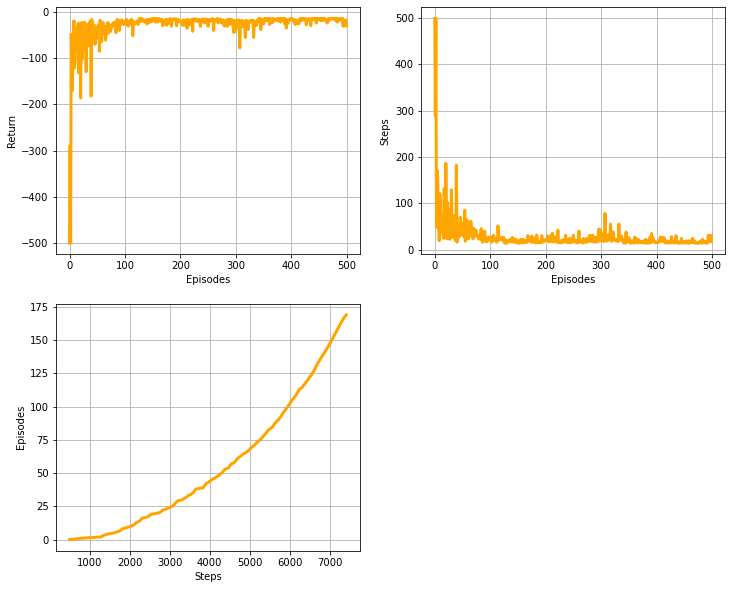

In [44]:

fig=plt.figure(figsize=(12,10))
plt.rcParams['font.size'] = '10'
plt.subplot(221)
plt.plot(r,linewidth=3,color='orange')
plt.grid()
plt.xlabel('Episodes')
plt.ylabel('Return')
plt.subplot(222)
plt.plot(stp,linewidth=3,color='orange')
plt.grid()
plt.xlabel('Episodes')
plt.ylabel('Steps')

plt.subplot(223)
plt.plot(cnt[:170],range(170),linewidth=3,color='orange')
plt.grid()
plt.xlabel('Steps')
plt.ylabel('Episodes')

plt.savefig('res_windygrid.png',dpi=350)